In [17]:
include("../src/Conduction.jl");
using StatsPlots, LaTeXStrings, QuadGK, Roots, CSV, DataFrames;

T = 300;

In [2]:
df = CSV.File("../data/xf_doped_alpha_npd_Ni3e21.csv") |> DataFrame

,r,xf_0,xf_3,xf_6,xf_9,xf_12,xf_15
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-20.0,0.148431,0.202723,0.219307,0.216745,0.209931,0.203026
2,-19.7,0.148437,0.202609,0.219115,0.21651,0.209668,0.202742
3,-19.4,0.14843,0.202451,0.21885,0.216191,0.209311,0.202357
4,-19.1,0.14843,0.202243,0.218502,0.215767,0.20884,0.20185
5,-18.8,0.148433,0.201966,0.217827,0.215219,0.208232,0.201195
6,-18.5,0.148434,0.201618,0.217479,0.214523,0.207461,0.200374
7,-18.2,0.148432,0.201185,0.216763,0.213669,0.206521,0.19937
8,-17.9,0.148431,0.200653,0.215899,0.212632,0.20538,0.198155
9,-17.6,0.148435,0.200008,0.214833,0.211442,0.204042,0.196701


In [3]:

range = df.r;
ratio = [0.001 * 10i for i in 0:3:15];

label_n = Matrix{String}(undef, 1, length(ratio));
for i in 1:length(ratio)
    label_n[1, i] = "Doping %: " * string(ratio[i] * 100);
end

In [12]:
data_xf = []
for i in names(df[!, r"xf"])
    append!(data_xf, [df[!, i]]);
end

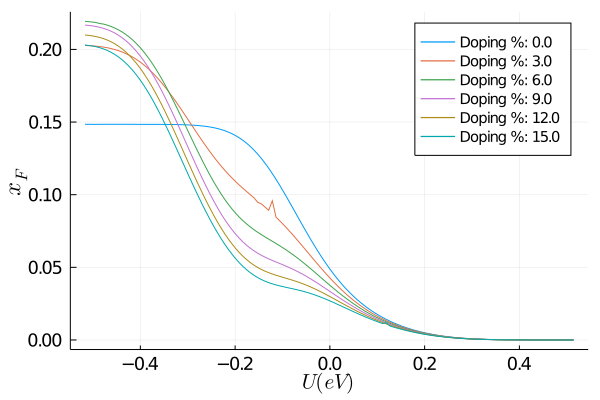

In [21]:
plot(df.r * Conduction.k * T / Conduction.ev, data_xf, label=label_n, xlabel=L"U (eV)", ylabel=L"x_F", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [26]:

semiconductor = Conduction.Semiconductor(
    4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
    0.1 * 1.6e-19, # Mode effect of the phonons (J)
    3e21, # intrinsic semiconductor's density (cm^-3)
    3e21 * 0.001, # Doping states' density (cm^-3)
    0.29 * 1.6e-19, # Energy to a vacant target site (J)
    1e13, # Base electron jump rate
    -0.62, # Fermi level (J)
    0.1, # Intrinsic semiconductor's gaussian width (J)
    0.1, # Doping states' gaussian width (J)
    );

F = -5.3e4; # Field (V.cm^-1)
T = 300;

DOS = []
for i in [0.03i for i in 0:3:15]
    DOS_i = []
    for u in df.r
        semiconductor.Nd = semiconductor.Ni * i;
        append!(DOS_i, Conduction.DOS(semiconductor, u, T));
    end
    append!(DOS, [DOS_i]);
end


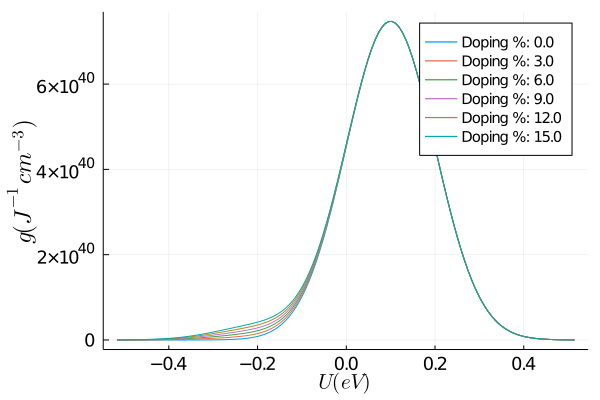

In [27]:
plot(range .* Conduction.k * T / Conduction.ev, DOS, label=label_n, xlabel=L"U (eV)", ylabel=L"g (J^{-1}cm^{-3})", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)
